In [1]:
%matplotlib inline


# Within Session P300

This example shows how to perform a within session analysis on three different
P300 datasets.

We will compare two pipelines :

- Riemannian geometry
- XDAWN with Linear Discriminant Analysis

We will use the P300 paradigm, which uses the AUC as metric.


In [15]:
# Authors: Pedro Rodrigues <pedro.rodrigues01@gmail.com>
#
# License: BSD (3-clause)

import warnings

import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import Vectorizer
from pyriemann.estimation import Xdawn, XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import DemonsP300
from moabb.datasets import BNCI2014_009
from moabb.evaluations import WithinSessionEvaluation
from moabb.paradigms import P300

getting rid of the warnings about the future



In [8]:
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

moabb.set_log_level("info")

## Create Pipelines

Pipelines must be a dict of sklearn pipeline transformer.



In [9]:
pipelines = {}

We have to do this because the classes are called 'Target' and 'NonTarget'
but the evaluation function uses a LabelEncoder, transforming them
to 0 and 1



In [10]:
labels_dict = {"Target": 1, "NonTarget": 0}

pipelines["RG+LDA"] = make_pipeline(
    XdawnCovariances(
        nfilter=2, classes=[labels_dict["Target"]], estimator="lwf", xdawn_estimator="scm"
    ),
    TangentSpace(),
    LDA(solver="lsqr", shrinkage="auto"),
)

pipelines["Xdw+LDA"] = make_pipeline(
    Xdawn(nfilter=2, estimator="scm"), Vectorizer(), LDA(solver="lsqr", shrinkage="auto")
)

## Evaluation

We define the paradigm (P300) and use all three datasets available for it.
The evaluation will return a DataFrame containing a single AUC score for
each subject / session of the dataset, and for each pipeline.

Results are saved into the database, so that if you add a new pipeline, it
will not run again the evaluation unless a parameter has changed. Results can
be overwritten if necessary.



In [22]:
paradigm = P300(resample=128)
print("charging dataset")
dataset = BNCI2014_009()
dataset.subject_list = dataset.subject_list[:]
print(dataset.subject_list)
datasets = [dataset]
overwrite = True  # set to True if we want to overwrite cached results
evaluation = WithinSessionEvaluation(
    paradigm=paradigm, datasets=datasets, suffix="examples", overwrite=overwrite
)

results = evaluation.process(pipelines)

2023-11-07 17:21:50,872 INFO MainThread moabb.evaluations.base Processing dataset: BNCI2014-009


charging dataset
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


BNCI2014-009-WithinSession:   0%|                                                               | 0/10 [00:00<?, ?it/s]

No hdf5_path provided, models will not be saved.


2023-11-07 17:21:56,079 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 0: Score 0.922


No hdf5_path provided, models will not be saved.


2023-11-07 17:21:56,778 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 0: Score 0.928


No hdf5_path provided, models will not be saved.


2023-11-07 17:21:58,966 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 1: Score 0.926


No hdf5_path provided, models will not be saved.


2023-11-07 17:21:59,706 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 1: Score 0.932


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:01,436 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 1 | 2: Score 0.923


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:02,097 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 1 | 2: Score 0.932
BNCI2014-009-WithinSession:  10%|█████▌                                                 | 1/10 [00:11<01:42, 11.40s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:22:07,235 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 0: Score 0.925


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:07,936 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 0: Score 0.937


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:09,653 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 1: Score 0.905


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:10,387 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 1: Score 0.952


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:12,329 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 2 | 2: Score 0.931


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:13,019 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 2 | 2: Score 0.926
BNCI2014-009-WithinSession:  20%|███████████                                            | 2/10 [00:22<01:29, 11.19s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:22:18,416 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 0: Score 0.687


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:19,059 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 0: Score 0.722


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:20,791 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 1: Score 0.911


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:21,512 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 1: Score 0.914


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:23,249 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 3 | 2: Score 0.938


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:23,906 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 3 | 2: Score 0.944
BNCI2014-009-WithinSession:  30%|████████████████▌                                      | 3/10 [00:33<01:16, 11.00s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:22:29,001 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 0: Score 0.929


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:29,666 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 0: Score 0.960


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:31,351 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 1: Score 0.933


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:32,893 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 1: Score 0.955


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:34,579 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 4 | 2: Score 0.907


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:35,256 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 4 | 2: Score 0.955
BNCI2014-009-WithinSession:  40%|██████████████████████                                 | 4/10 [00:44<01:06, 11.14s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:22:40,407 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 0: Score 0.949


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:41,073 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 0: Score 0.970


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:42,716 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 1: Score 0.925


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:43,407 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 1: Score 0.949


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:45,066 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 5 | 2: Score 0.934


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:45,725 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 5 | 2: Score 0.944
BNCI2014-009-WithinSession:  50%|███████████████████████████▌                           | 5/10 [00:55<00:54, 10.89s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:22:50,958 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 0: Score 0.861


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:51,640 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 0: Score 0.872


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:53,337 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 1: Score 0.899


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:54,040 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 1: Score 0.917


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:55,725 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 6 | 2: Score 0.892


No hdf5_path provided, models will not be saved.


2023-11-07 17:22:56,394 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 6 | 2: Score 0.914
BNCI2014-009-WithinSession:  60%|█████████████████████████████████                      | 6/10 [01:05<00:43, 10.82s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:23:01,634 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 0: Score 0.917


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:02,299 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 0: Score 0.905


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:04,083 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 1: Score 0.920


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:04,786 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 1: Score 0.920


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:06,491 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 7 | 2: Score 0.863


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:07,150 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 7 | 2: Score 0.877
BNCI2014-009-WithinSession:  70%|██████████████████████████████████████▌                | 7/10 [01:16<00:32, 10.80s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:23:12,199 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 0: Score 0.886


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:12,876 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 0: Score 0.900


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:14,586 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 1: Score 0.868


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:15,251 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 1: Score 0.881


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:16,987 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 8 | 2: Score 0.815


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:17,672 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 8 | 2: Score 0.877
BNCI2014-009-WithinSession:  80%|████████████████████████████████████████████           | 8/10 [01:26<00:21, 10.71s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:23:22,899 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 0: Score 0.955


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:23,564 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 0: Score 0.969


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:25,294 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 1: Score 0.935


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:25,968 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 1: Score 0.976


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:28,373 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 9 | 2: Score 0.892


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:29,051 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 9 | 2: Score 0.943
BNCI2014-009-WithinSession:  90%|█████████████████████████████████████████████████▌     | 9/10 [01:38<00:10, 10.92s/it]

No hdf5_path provided, models will not be saved.


2023-11-07 17:23:34,062 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 0: Score 0.980


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:34,714 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 0: Score 0.986


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:36,352 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 1: Score 0.968


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:37,029 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 1: Score 0.974


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:38,678 INFO MainThread moabb.evaluations.base RG+LDA | BNCI2014-009 | 10 | 2: Score 0.953


No hdf5_path provided, models will not be saved.


2023-11-07 17:23:39,330 INFO MainThread moabb.evaluations.base Xdw+LDA | BNCI2014-009 | 10 | 2: Score 0.968
BNCI2014-009-WithinSession: 100%|██████████████████████████████████████████████████████| 10/10 [01:48<00:00, 10.86s/it]


## Plot Results

Here we plot the results to compare the two pipelines



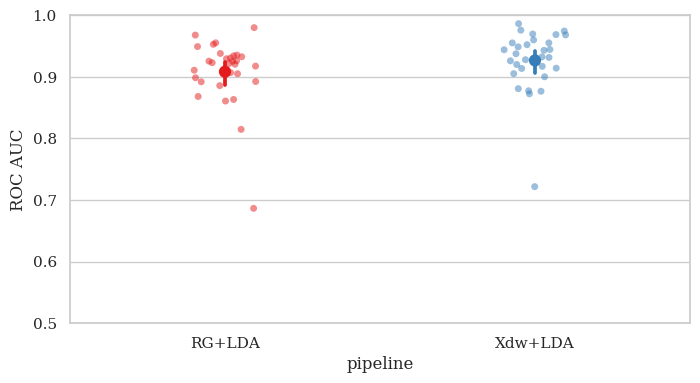

In [23]:
fig, ax = plt.subplots(facecolor="white", figsize=[8, 4])

sns.stripplot(
    data=results,
    y="score",
    x="pipeline",
    ax=ax,
    jitter=True,
    alpha=0.5,
    zorder=1,
    palette="Set1",
)
sns.pointplot(data=results, y="score", x="pipeline", ax=ax, palette="Set1")

ax.set_ylabel("ROC AUC")
ax.set_ylim(0.5, 1)

plt.show()